In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
#load & view raw data
df = pd.read_csv(r"C:\\Users\\Anusha Badami\\Downloads\\insurance_claims.csv")
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.184000,1.859000,3.242000,2.966000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.939695,1.282483,2.155942,2.044266,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,3.000000,5.000000,5.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000


In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                    int32
collision_type                  object
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location               object
incident_hour_of_the_day 

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
df.shape

(1000, 39)

In [9]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

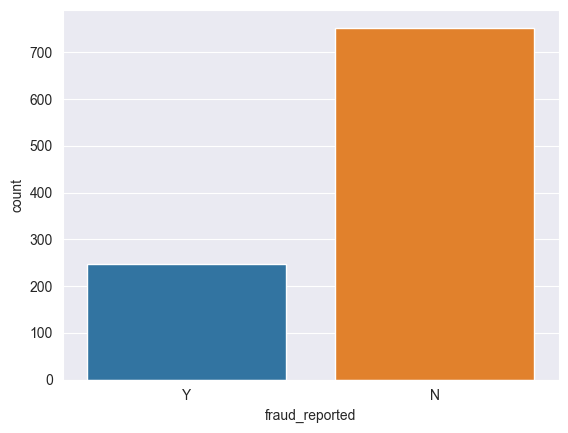

In [11]:
sns.set_style('darkgrid')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')
plt.show()

In [12]:
df['incident_state'].value_counts()

incident_state
1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: count, dtype: int64

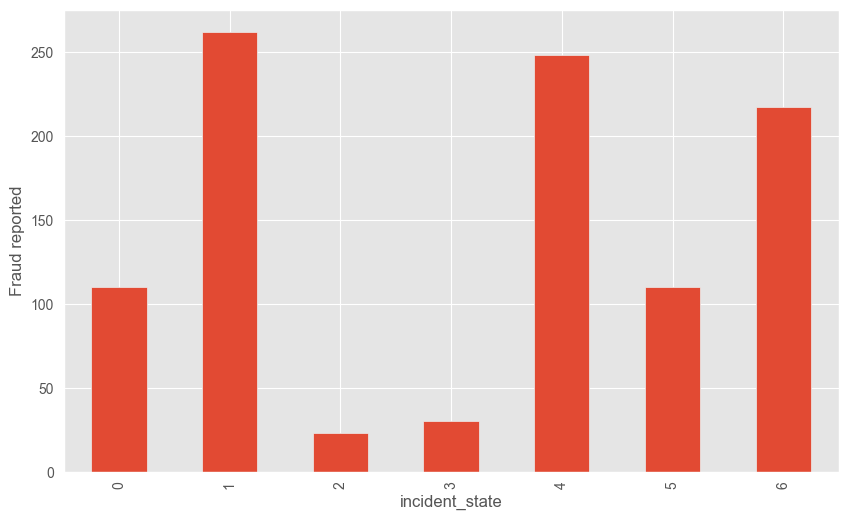

In [13]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

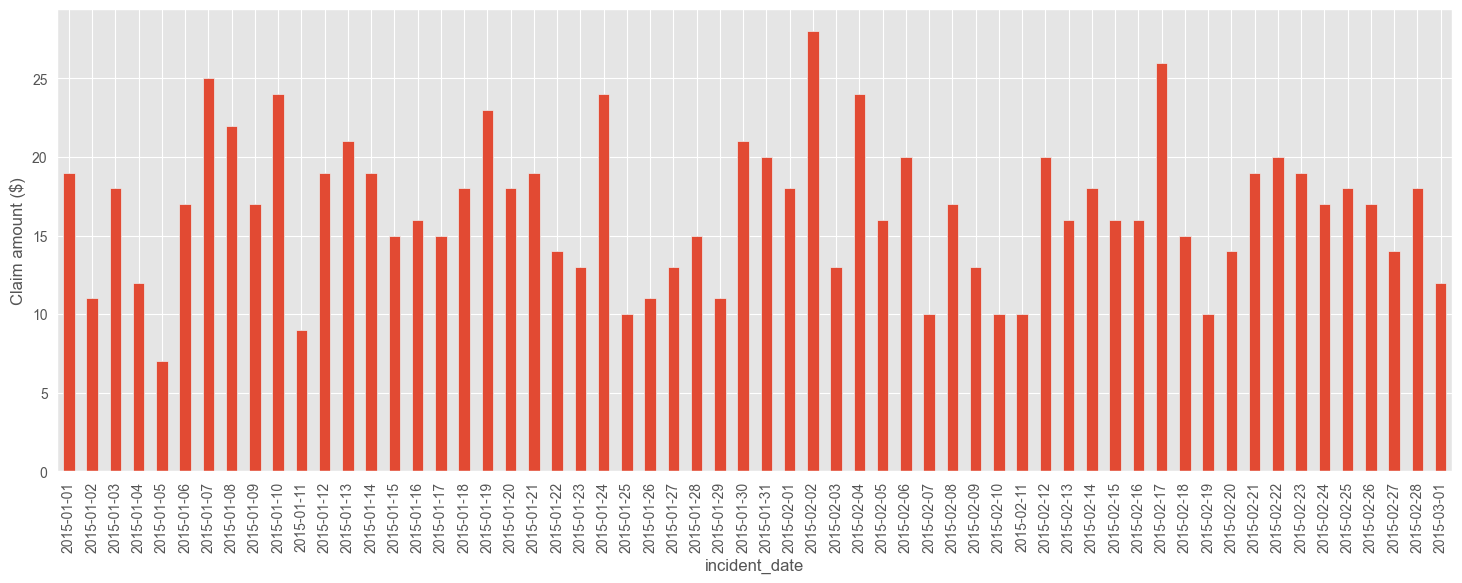

In [14]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

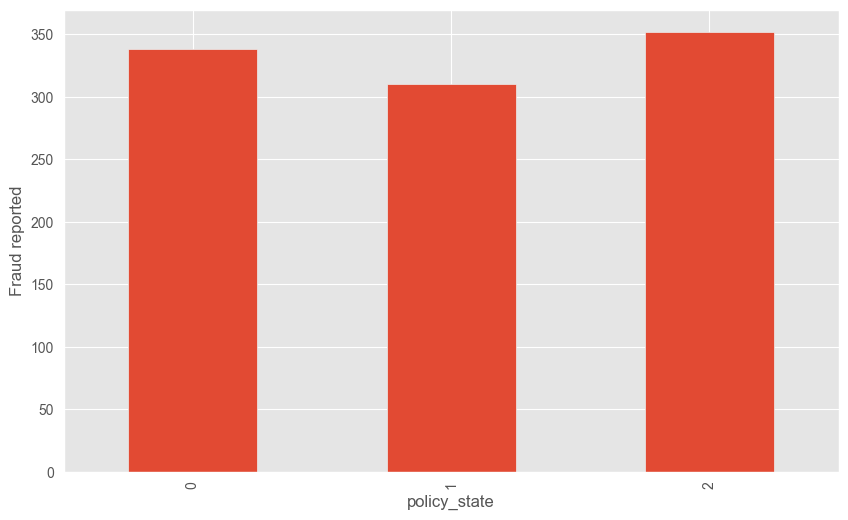

In [15]:
plt.style.use('ggplot')  

fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

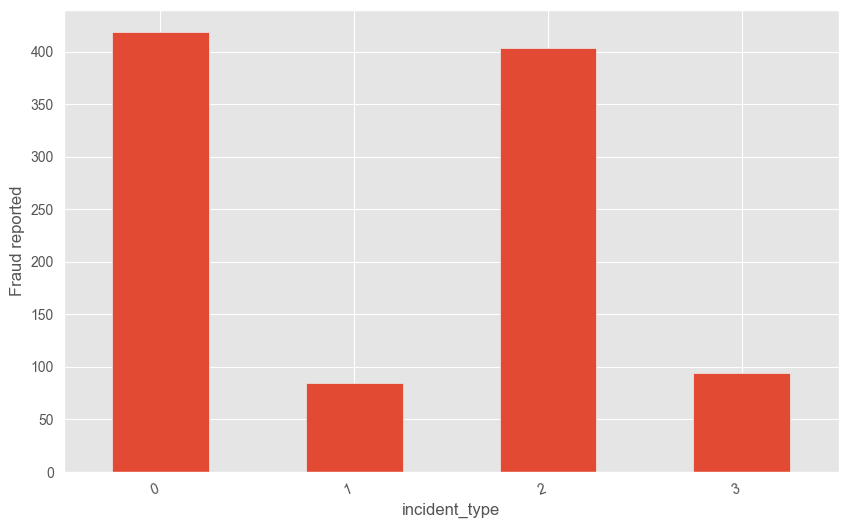

In [16]:
plt.style.use('ggplot') 

fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

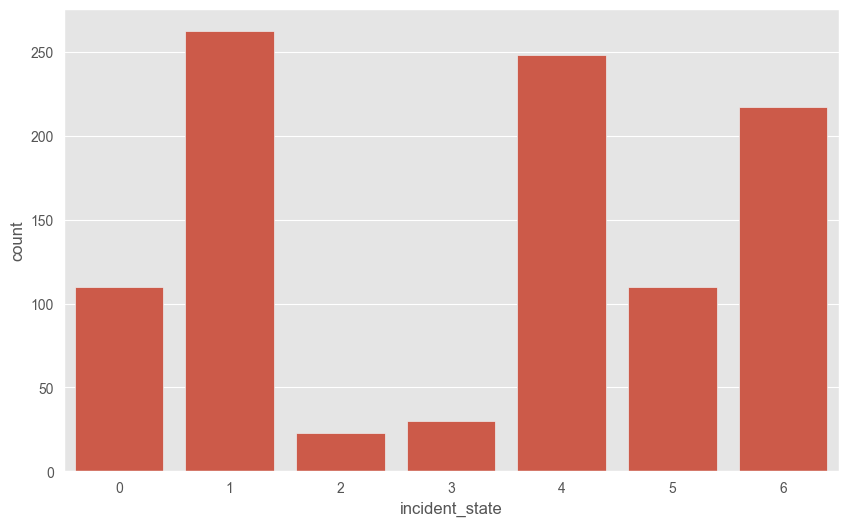

In [17]:
plt.style.use('ggplot')  # Using ggplot style
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)
plt.show()

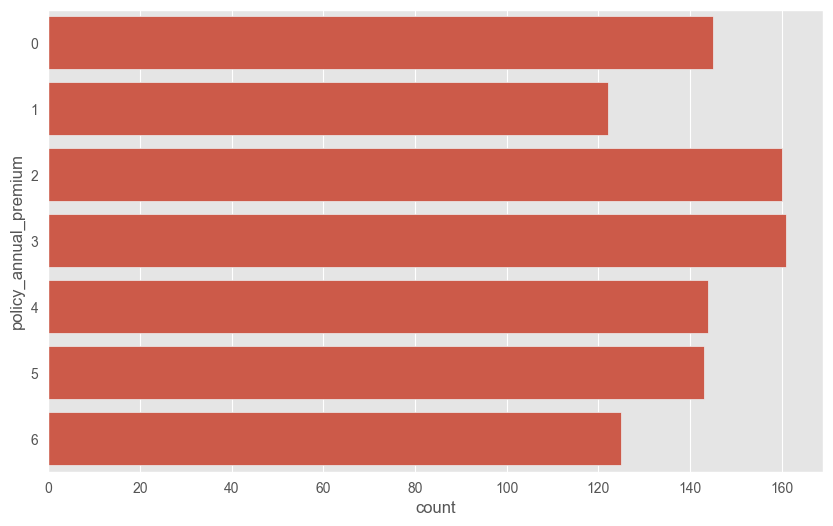

In [18]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

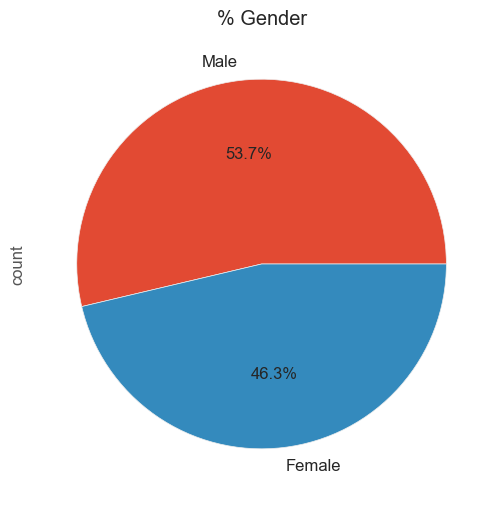

In [19]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

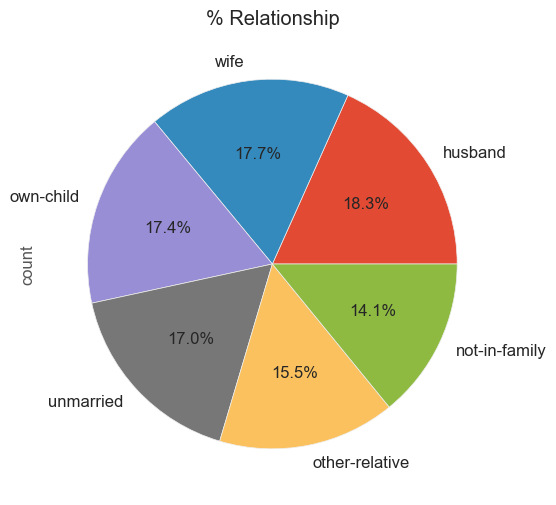

In [20]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

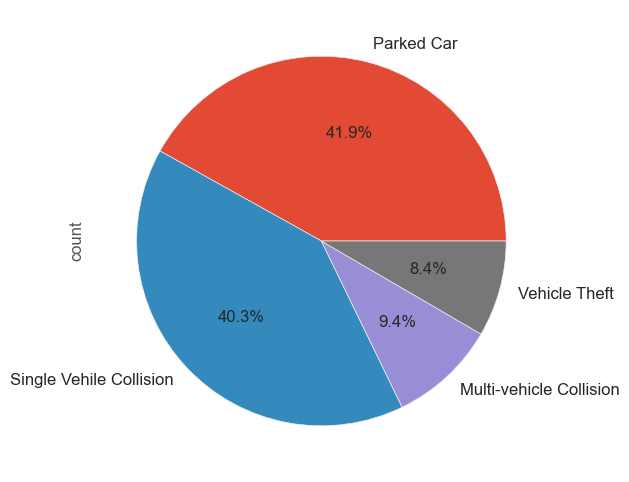

In [21]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

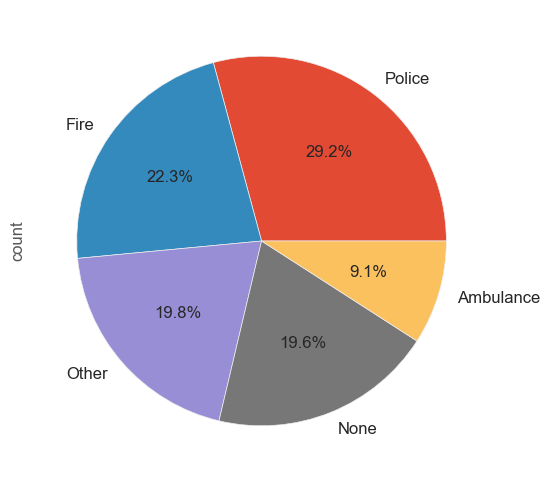

In [22]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

C:\Users\Anusha Badami\AppData\Local\Temp\ipykernel_45124\3927641007.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


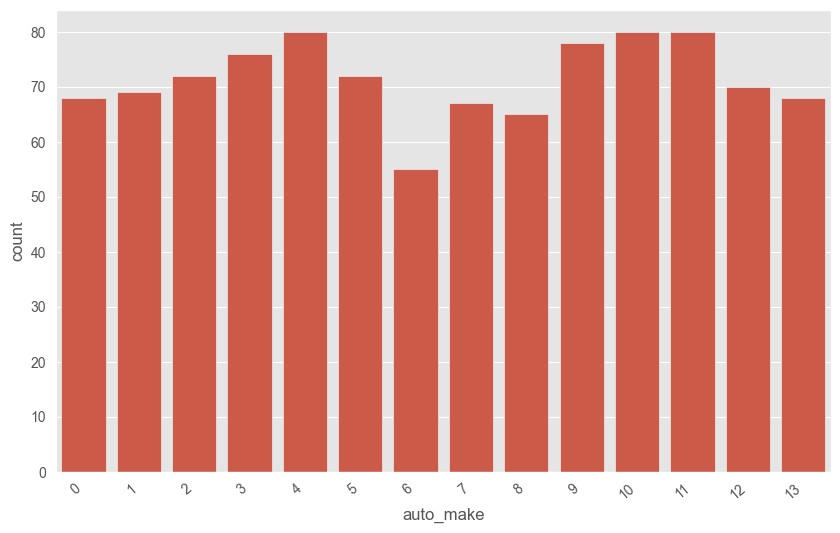

In [23]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

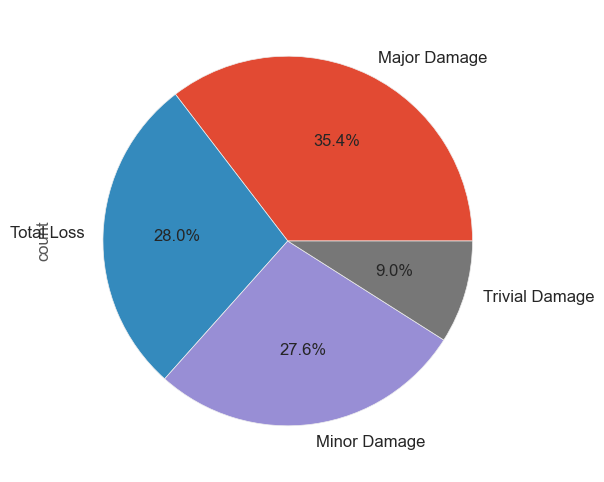

In [24]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

C:\Users\Anusha Badami\AppData\Local\Temp\ipykernel_45124\611832178.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


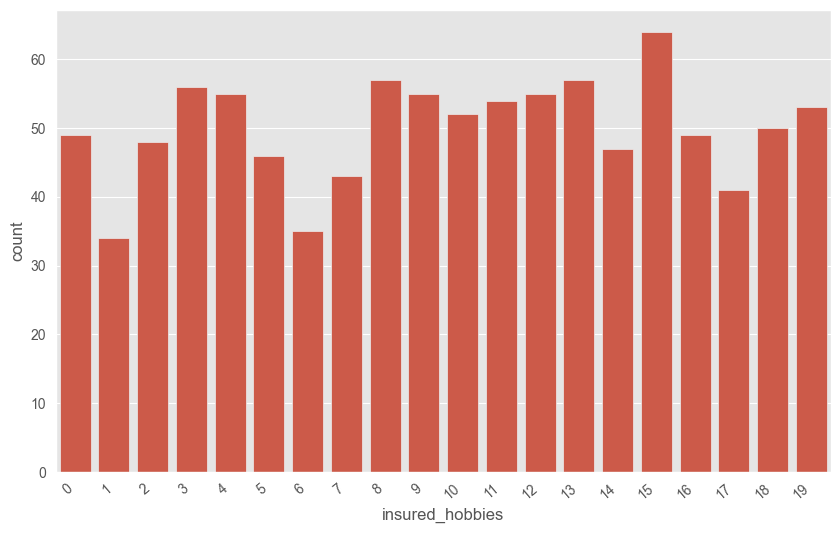

In [25]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [26]:
df["insured_occupation"].value_counts()

insured_occupation
6     93
9     85
12    78
11    76
3     76
2     74
13    72
7     71
8     71
1     69
0     65
10    63
5     54
4     53
Name: count, dtype: int64

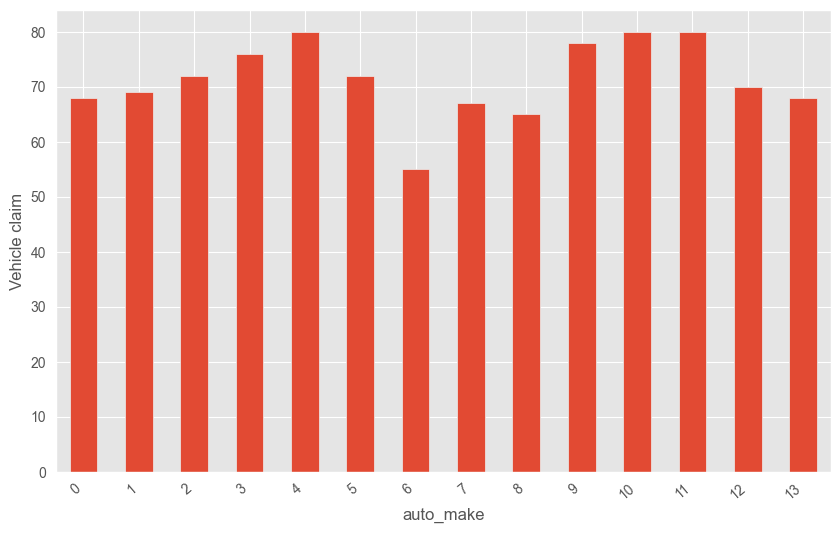

In [27]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
ax = df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

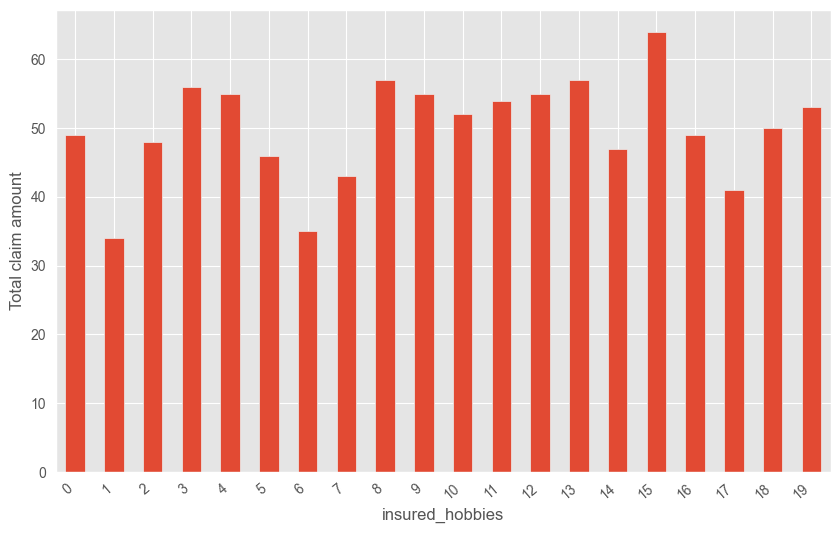

In [28]:
plt.style.use('ggplot')  

fig = plt.figure(figsize=(10, 6))
ax = df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

DATA PREPROCESSING


In [29]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

C:\Users\Anusha Badami\AppData\Local\Temp\ipykernel_45124\2625771737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
C:\Users\Anusha Badami\AppData\Local\Temp\ipykernel_45124\2625771737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,Side Collision,0,3,4,1,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,?,1,3,5,5,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,Rear Collision,1,3,1,1,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-01-10,2,Front Collision,0,3,2,0,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,3,?,1,4,1,0,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,0,31,2009,0


In [30]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [31]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.184000,1.859000,3.242000,2.966000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.939695,1.282483,2.155942,2.044266,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,3.000000,5.000000,5.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [32]:
df.auto_year.value_counts() 

auto_year
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: count, dtype: int64

In [33]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [34]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [35]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'insured_zip', 'incident_date', 'collision_type',
       'incident_location', 'property_damage', 'police_report_available',
       'incident_period_of_day'],
      dtype='object')

In [36]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,Side Collision,0,3,4,1,1,YES,1,2,YES,71610,6510,13020,52080,10,1,1,14,early_morning
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,?,1,3,5,5,1,?,0,0,?,5070,780,780,3510,8,12,1,11,morning


In [37]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
collision_type           178
property_damage          360
police_report_available  343
incident_period_of_day     0


In [38]:
df.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

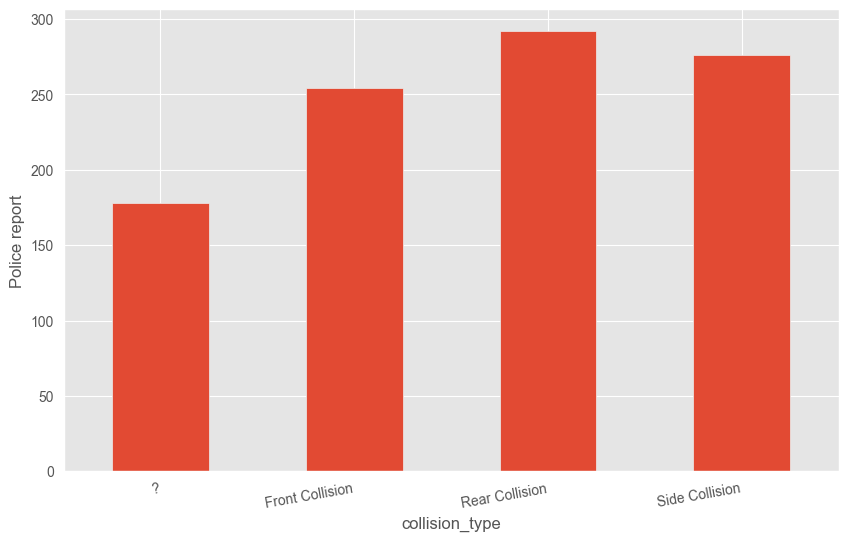

In [39]:
plt.style.use('ggplot') 

fig = plt.figure(figsize=(10, 6))
ax = df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [40]:
df.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

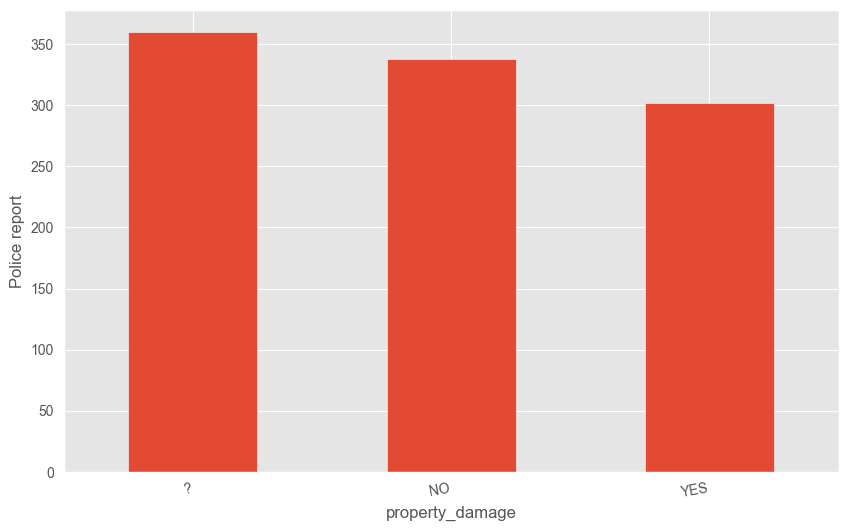

In [41]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [42]:
df.police_report_available.value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [43]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [44]:
df._get_numeric_data().head() 

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,0,3,4,1,1,1,2,71610,6510,13020,52080,10,1,1,14
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,3,5,5,1,0,0,5070,780,780,3510,8,12,1,11
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,3,1,1,3,2,3,34650,7700,3850,23100,4,30,0,11
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,3,2,0,1,1,2,63400,6340,6340,50720,3,34,1,4
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,4,1,0,1,0,1,6500,1300,650,4550,0,31,0,9


In [45]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [46]:
df.select_dtypes(include=['object']).columns  

Index(['collision_type', 'property_damage', 'police_report_available',
       'incident_period_of_day'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = [
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'incident_period_of_day'
]

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Concatenate encoded columns with original dataframe
encoded_df = df[categorical_columns].join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

encoded_df.head()


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,incident_period_of_day,collision_type,property_damage,police_report_available,fraud_reported
0,2,1,1,4,2,17,0,2,0,3,4,1,10,1,1,Side Collision,YES,YES,1
1,1,1,1,4,6,15,2,3,1,3,5,5,8,12,4,?,?,?,1
2,2,0,0,6,11,2,3,0,1,3,1,1,4,30,4,Rear Collision,NO,NO,0
3,0,1,0,6,1,2,4,2,0,3,2,0,3,34,1,Front Collision,?,NO,1
4,0,2,1,0,11,2,4,3,1,4,1,0,0,31,2,?,NO,NO,0


In [48]:
X = encoded_df.iloc[:, 0:-1]
y = encoded_df.iloc[:, -1]

In [49]:
X.head(2)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,incident_period_of_day,collision_type,property_damage,police_report_available
0,2,1,1,4,2,17,0,2,0,3,4,1,10,1,1,Side Collision,YES,YES
1,1,1,1,4,6,15,2,3,1,3,5,5,8,12,4,?,?,?


In [50]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [51]:
X['collision_en'] = LabelEncoder().fit_transform(encoded_df['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [52]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10) 

C:\Users\Anusha Badami\AppData\Local\Temp\ipykernel_45124\1491443298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
C:\Users\Anusha Badami\AppData\Local\Temp\ipykernel_45124\1491443298.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,incident_period_of_day,collision_type,property_damage,police_report_available,collision_en
0,2,1,1,4,2,17,0,2,0,3,4,1,10,1,1,Side Collision,1,1,3
1,1,1,1,4,6,15,2,3,1,3,5,5,8,12,4,?,0,0,0
2,2,0,0,6,11,2,3,0,1,3,1,1,4,30,4,Rear Collision,0,0,2
3,0,1,0,6,1,2,4,2,0,3,2,0,3,34,1,Front Collision,0,0,1
4,0,2,1,0,11,2,4,3,1,4,1,0,0,31,2,?,0,0,0
5,2,1,0,6,12,3,4,0,0,1,4,0,10,3,2,Rear Collision,0,0,2
6,1,1,1,6,9,2,0,0,1,3,1,6,9,29,6,Front Collision,0,0,1
7,0,0,1,0,12,0,4,0,2,3,5,1,1,5,5,Front Collision,0,1,1
8,0,0,0,6,7,9,3,2,2,3,6,0,12,9,5,Front Collision,0,1,1
9,0,0,1,6,8,4,5,2,2,2,0,2,10,1,0,Rear Collision,0,0,2


In [53]:
X = X.drop(columns = ['collision_type'])
X.head(2)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,incident_period_of_day,property_damage,police_report_available,collision_en
0,2,1,1,4,2,17,0,2,0,3,4,1,10,1,1,1,1,3
1,1,1,1,4,6,15,2,3,1,3,5,5,8,12,4,0,0,0


In [54]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model,incident_period_of_day,property_damage,police_report_available,collision_en,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,2,1,1,4,2,17,0,2,0,3,4,1,10,1,1,1,1,3,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,0,3,4,1,1,1,2,71610,6510,13020,52080,10,1,1,14,1
1,1,1,1,4,6,15,2,3,1,3,5,5,8,12,4,0,0,0,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,3,5,5,1,0,0,5070,780,780,3510,8,12,1,11,4


In [55]:
X.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model',
       'incident_period_of_day', 'property_damage', 'police_report_available',
       'collision_en', 'months_as_customer', 'age', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'fraud_reported', 'vehicle_a

In [56]:
X = X.drop(columns = ['fraud_reported'])
X.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model',
       'incident_period_of_day', 'property_damage', 'police_report_available',
       'collision_en', 'months_as_customer', 'age', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'vehicle_age', 'incident_per

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Initialize LDA model
model = LinearDiscriminantAnalysis()

# Specify KFold with shuffle=True
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform cross-validation
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())


0.759


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


RANDOM FOREST CLASSIFIER

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion='gini', n_estimators=1000, verbose=1, n_jobs=-1, 
                             class_weight='balanced', max_features='sqrt')
rfcg = rfc.fit(X_train, y_train)  # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions) * 100, 2))
print('Cohen Kappa: ' + str(np.round(cohen_kappa_score(y_test, predictions), 3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions) * 100, 2))
print('\n Classification Report:\n', classification_report(y_test, predictions))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s


Baseline: N_features:  48
Baseline: Accuracy:  77.5
Cohen Kappa: 0.374
Baseline: Recall:  36.07

 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.86       139
           1       0.79      0.36      0.49        61

    accuracy                           0.78       200
   macro avg       0.78      0.66      0.67       200
weighted avg       0.78      0.78      0.75       200



[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [62]:
rfcg

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       verbose=1)

Confusion matrix
[[133   6]
 [ 39  22]]


<Figure size 640x480 with 0 Axes>

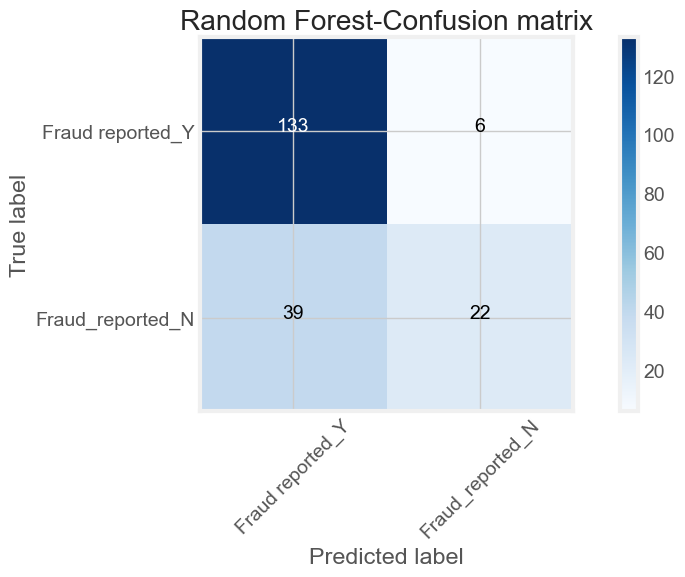

In [63]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='Random Forest-Confusion matrix')

##### With 72.5% accuracy, we take a closer look at the confusion matrix:
 
 - 132 transactions were classified as valid that were actually valid
 - 7 transactions were classified as fraud that were actually valid (type 1 error)
 - 48 transactions were classified as valid that were fraud (type 2 error)
 - 13 transactions were classified as fraud.
 
 Err = ((FP+FN)/ (TP+TN+FN+FP) = {(48+7) / (132+7+48+13)}*100 = 0.275
 
So, the algorithm misclassified 27.5% fraudulent transactions. We looked at other measures too like the Cohen Kappa, Recall, and F1 score. In each case, the scores are closer to 1.

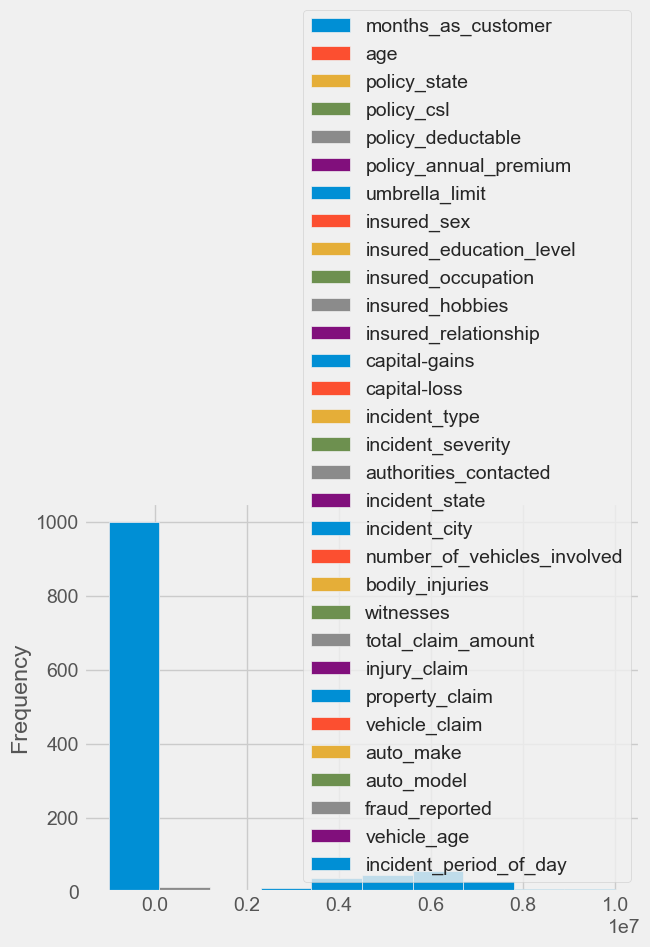

In [64]:
# Generate a Histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

In [66]:
# Minimum and maximum age of vehicle
print('Vehicle age-minimum ' + str(df['vehicle_age'].min()))
print('Vehicle Age-maximum ' + str(df['vehicle_age'].max()))

Vehicle age-minimum 3
Vehicle Age-maximum 23


In [65]:
# Minimum and maximum premium 
print('Minimum premimum ' + str(df['policy_annual_premium'].min()))
print('Maximum premium ' + str(df['policy_annual_premium'].max()))

Minimum premimum 433.33
Maximum premium 2047.59


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

LR: 0.770000 (0.052500)
XGB: 0.801250 (0.054615)
KNN: 0.756250 (0.065966)
DT: 0.781250 (0.057893)
SVM: 0.765000 (0.056403)
RF: 0.772500 (0.039843)


c:\Users\Anusha Badami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anusha Badami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anusha Badami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anusha Badami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAM

ADA: 0.781250 (0.053400)


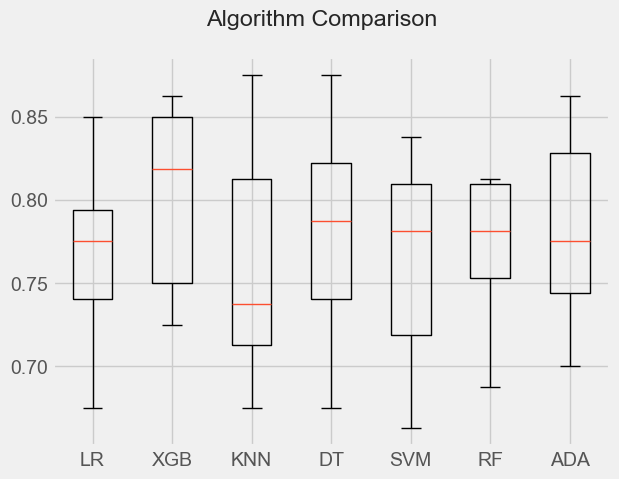

In [69]:
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=seed)))
models.append(('SVM', SVC(gamma='auto', random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=seed)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=seed)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


##### Above a list of each algorithm, the mean accuracy and the standard deviation accuracy and a box & whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

##### It is clear that the LR or LDA is good enough for both feature selection (81% and 84% accuracy with 100 features) as well as model selection. 

